# Importing Libraries and Dataset

In [7]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [28]:
data = pd.read_csv("C:\\Users\\anves\\OneDrive\\Documents\\LoanEligibilityPrediction.csv") 
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,LP002978,Female,No,0.0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
594,LP002979,Male,Yes,3.0,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
595,LP002983,Male,Yes,1.0,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
596,LP002984,Male,Yes,2.0,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [11]:
data.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Data Preprocessing and Visualization

In [12]:
obj = (data.dtypes == 'object') 
print("Categorical variables:",len(list(obj[obj].index)))


Categorical variables: 7


In [13]:
# Dropping Loan_ID column 
data.drop(['Loan_ID'],axis=1,inplace=True)

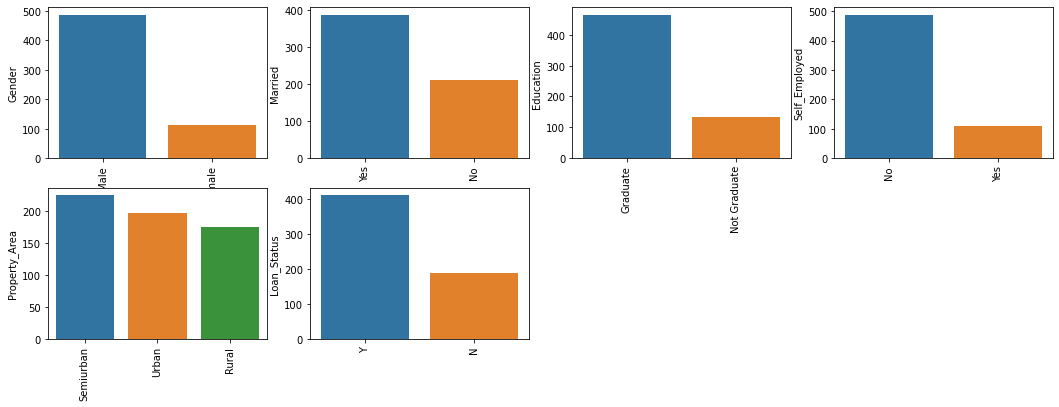

In [14]:
obj = (data.dtypes == 'object') 
object_cols = list(obj[obj].index) 
plt.figure(figsize=(18,36)) 
index = 1

for col in object_cols: 
    y = data[col].value_counts() 
    plt.subplot(11,4,index) 
    plt.xticks(rotation=90) 
    sns.barplot(x=list(y.index), y=y) 
    index +=1


In [15]:
from sklearn import preprocessing 
    
# label_encoder object knows how  
# to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
obj = (data.dtypes == 'object') 
for col in list(obj[obj].index): 
  data[col] = label_encoder.fit_transform(data[col])

In [16]:
# To find the number of columns with  
# datatype==object 
obj = (data.dtypes == 'object') 
print("Categorical variables:",len(list(obj[obj].index)))

Categorical variables: 0


In [27]:
import pandas as pd

# Assuming 'df' is your DataFrame with columns 'ApplicantIncome' and 'LoanAmount'
# You can load your data using pd.read_csv or any other method

# Calculate the IQR for each column
Q1_income = data['ApplicantIncome'].quantile(0.25)
Q3_income = data['ApplicantIncome'].quantile(0.75)
IQR_income = Q3_income - Q1_income

Q1_loan = data['LoanAmount'].quantile(0.25)
Q3_loan = data['LoanAmount'].quantile(0.75)
IQR_loan = Q3_loan - Q1_loan

# Define the upper and lower bounds to identify outliers
lower_bound_income = Q1_income - 1.5 * IQR_income
upper_bound_income = Q3_income + 1.5 * IQR_income

lower_bound_loan = Q1_loan - 1.5 * IQR_loan
upper_bound_loan = Q3_loan + 1.5 * IQR_loan

# Filter the DataFrame to exclude outliers
df = data[
    (data['ApplicantIncome'] >= lower_bound_income) & (data['ApplicantIncome'] <= upper_bound_income) &
    (data['LoanAmount'] >= lower_bound_loan) & (data['LoanAmount'] <= upper_bound_loan)
]


# The resulting DataFrame (df_filtered) will not contain outliers in the specified columns


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0.0,0,0,5849,0.0,144.968804,360.0,1.0,2,1
1,1,1,1.0,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0.0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0.0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0.0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
593,0,0,0.0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
594,1,1,3.0,0,0,4106,0.0,40.000000,180.0,1.0,0,1
595,1,1,1.0,0,0,8072,240.0,253.000000,360.0,1.0,2,1
596,1,1,2.0,0,0,7583,0.0,187.000000,360.0,1.0,2,1


# BOX PLOT

In [32]:
import pandas as pd
from scipy import stats

# Assuming 'df' is your DataFrame with columns 'ApplicantIncome' and 'LoanAmount'

# Calculate Z-scores for 'ApplicantIncome' and 'LoanAmount'
z_scores_income = stats.zscore(df['ApplicantIncome'])
z_scores_loan = stats.zscore(df['LoanAmount'])

# Set a threshold for Z-scores (e.g., 3 standard deviations)
threshold = 3

# Filter the DataFrame to exclude rows with outliers
df_filtered = df[(abs(z_scores_income) < threshold) & (abs(z_scores_loan) < threshold)]

# The resulting DataFrame (df_filtered) will not contain outliers in the specified columns


In [45]:
import pandas as pd

# Assuming you have a DataFrame named 'df' with columns 'ApplicantIncome' and 'LoanAmount'

# Step 1: Calculate mean and standard deviation
mean_income = df['ApplicantIncome'].mean()
std_income = df['ApplicantIncome'].std()

mean_loan_amount = df['LoanAmount'].mean()
std_loan_amount = df['LoanAmount'].std()

# Step 2: Define a threshold (e.g., 3 standard deviations)
threshold_income = 3 * std_income
threshold_loan_amount = 3 * std_loan_amount

# Step 3: Remove outliers
df1= df[
    (df['ApplicantIncome'] < mean_income + threshold_income) &
    (df['ApplicantIncome'] > mean_income - threshold_income) &
    (df['LoanAmount'] < mean_loan_amount + threshold_loan_amount) &
    (df['LoanAmount'] > mean_loan_amount - threshold_loan_amount)
]

# Now df_no_outliers contains the DataFrame without outliers in the specified columns


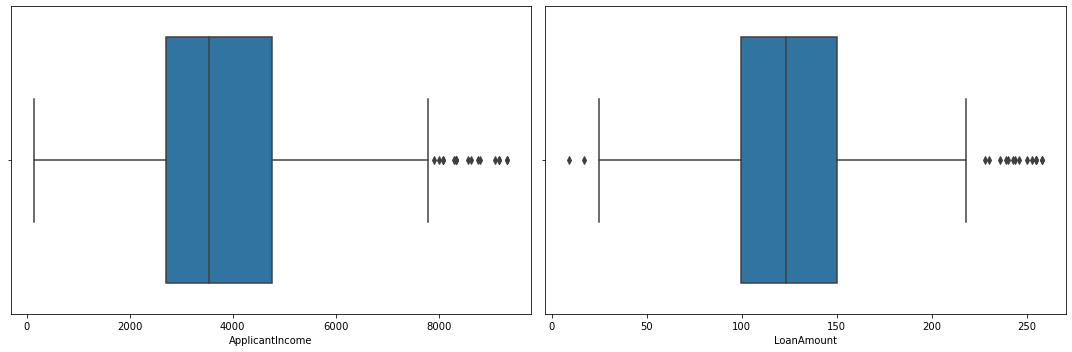

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 5))

for i, col in enumerate(['ApplicantIncome', 'LoanAmount']):
    plt.subplot(1, 2, i+1)
    sns.boxplot(x=df1[col])  # Use x= to specify the data variable for boxplot

plt.tight_layout()
plt.show()


# HEAT MAP

<AxesSubplot:>

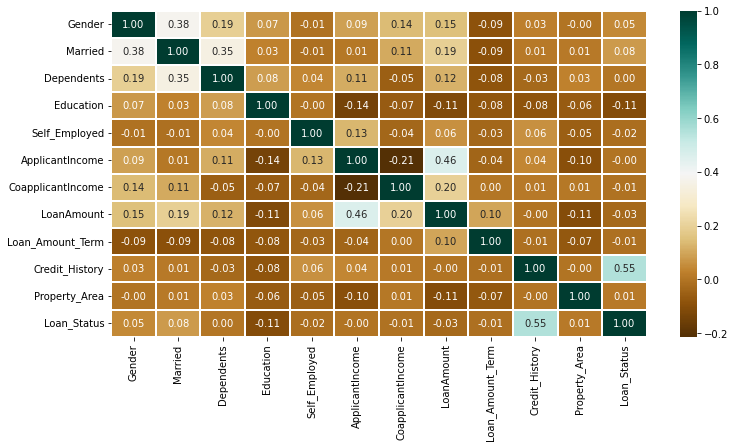

In [39]:
plt.figure(figsize=(12,6)) 
  
sns.heatmap(d.corr(),cmap='BrBG',fmt='.2f', 
            linewidths=2,annot=True)
#The heatmap is showing the correlation between Loan Amount and ApplicantIncome. 
#It also shows that Credit_History has a high impact on Loan_Status.

# CAT PLOT


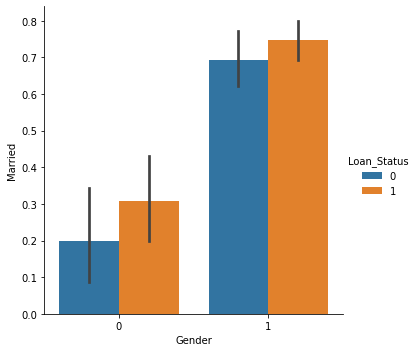

In [38]:
sns.catplot(x="Gender", y="Married", hue="Loan_Status", kind="bar", data=df)


# FINDING MISSING VALUES

In [36]:
import pandas as pd
import numpy as np
import warnings

# Assuming 'df' is your DataFrame

# Suppress warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    
    # Impute missing values with mean for each column
    for col in df.columns:
        df[col] = df[col].fillna(df[col].mean())

# Check for remaining missing values
missing_values = df.isna().sum()

# Display the number of missing values
print("Remaining missing values after imputation:")
print(missing_values)


Remaining missing values after imputation:
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [22]:
#As there is no missing value then we must proceed to model training.

# SPLITTING DATASET

In [37]:
from sklearn.model_selection import train_test_split 

X = df.drop(['Loan_Status'],axis=1) 
Y = df['Loan_Status'] 
X.shape,Y.shape 

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    test_size=0.4, 
                                                    random_state=1) 
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape


((318, 11), (213, 11), (318,), (213,))

# Model Training and Evaluation

In [38]:
#To predict the accuracy we will use the accuracy score function from scikit-learn library.

In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Instantiate models
knn = KNeighborsClassifier(n_neighbors=3)
rfc = RandomForestClassifier(n_estimators=7, criterion='entropy', random_state=7)
svc = SVC()
lc = LogisticRegression(max_iter=1000, solver='lbfgs')  # Increase max_iter and specify solver

# making predictions on the training set
for clf in (rfc, knn, svc, lc):
    if clf == lc:  # Apply scaling to Logistic Regression
        model = make_pipeline(StandardScaler(), clf)
    else:
        model = clf

    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_train)
    print("Accuracy score of", clf.__class__.__name__, "=", 100 * metrics.accuracy_score(Y_train, Y_pred))



Accuracy score of RandomForestClassifier = 97.79874213836479
Accuracy score of KNeighborsClassifier = 78.9308176100629
Accuracy score of SVC = 70.44025157232704
Accuracy score of LogisticRegression = 83.01886792452831


# Prediction on the test set

In [41]:
for clf in (rfc, knn, svc,lc): 
    clf.fit(X_train, Y_train) 
    Y_pred = clf.predict(X_test) 
    print("Accuracy score of ", clf.__class__.__name__,"=", 100*metrics.accuracy_score(Y_test, Y_pred))

Accuracy score of  RandomForestClassifier = 79.81220657276995
Accuracy score of  KNeighborsClassifier = 67.6056338028169
Accuracy score of  SVC = 68.54460093896714
Accuracy score of  LogisticRegression = 79.81220657276995
